In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 잘 보기 위해 선언
from jupyterthemes import jtplot
jtplot.style(theme='grade3')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
jtplot.reset()
jtplot.style(theme='grade3', fscale=2.0,grid=False)

# 데이터 확인

## 데이터 Load

In [3]:
from pathlib import Path
path = Path.cwd() / 'data/titanic'

In [4]:
df_train = pd.read_csv(path / 'train.csv')
df_test = pd.read_csv(path / 'test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Null data
- Cabin : train, test 모두 80%
- Age : train, test 모두 20%
- Embarked : train 2개
- Fare : test 1개

In [7]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [8]:
df_test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

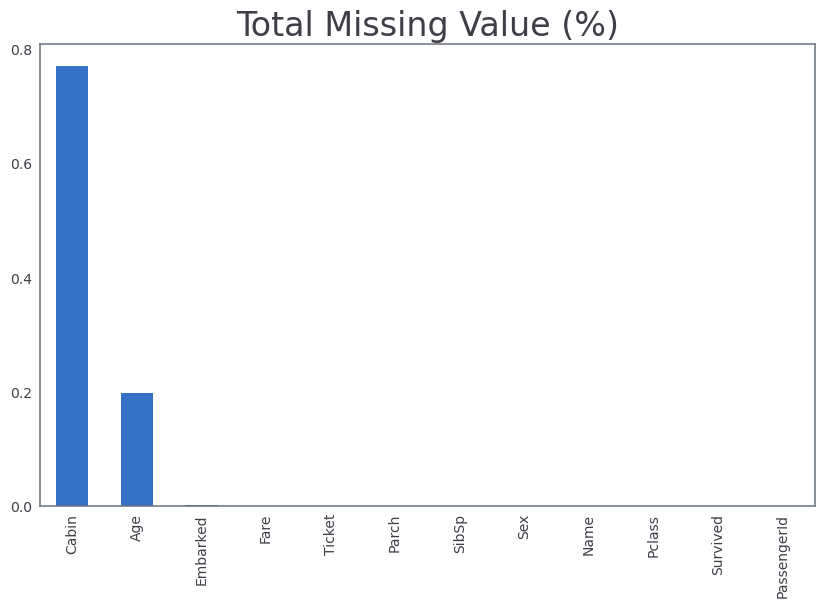

In [9]:
percent_train = df_train.isnull().sum().sort_values(ascending=False)/len(df_train)
percent_train.plot(kind="bar", figsize = (10,6), fontsize = 10)
plt.title("Total Missing Value (%)")
plt.show()

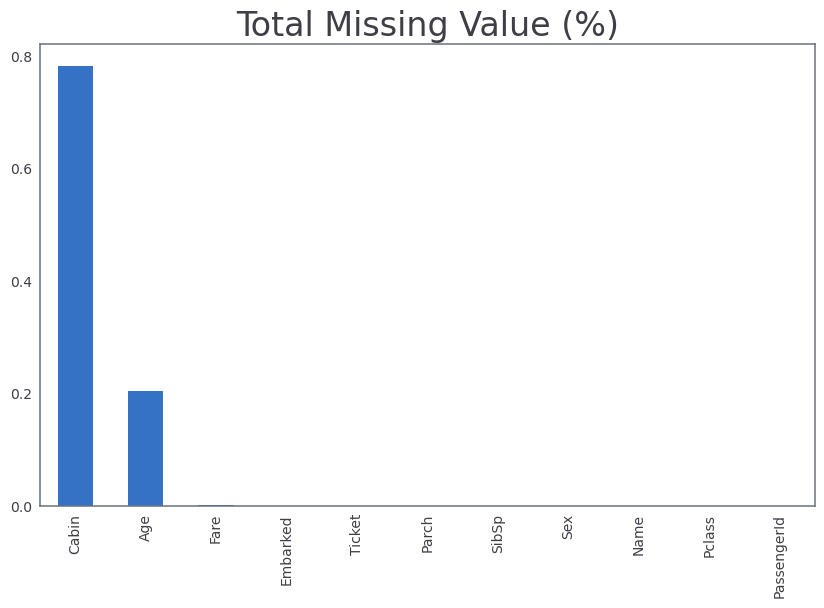

In [10]:
percent_test = df_test.isnull().sum().sort_values(ascending=False)/len(df_test)
percent_test.plot(kind="bar", figsize = (10,6), fontsize = 10)
plt.title("Total Missing Value (%)")
plt.show()

## Target Label 확인
- 0 : die, 1 : Survive
- 타겟 데이터의 분포가 balanced

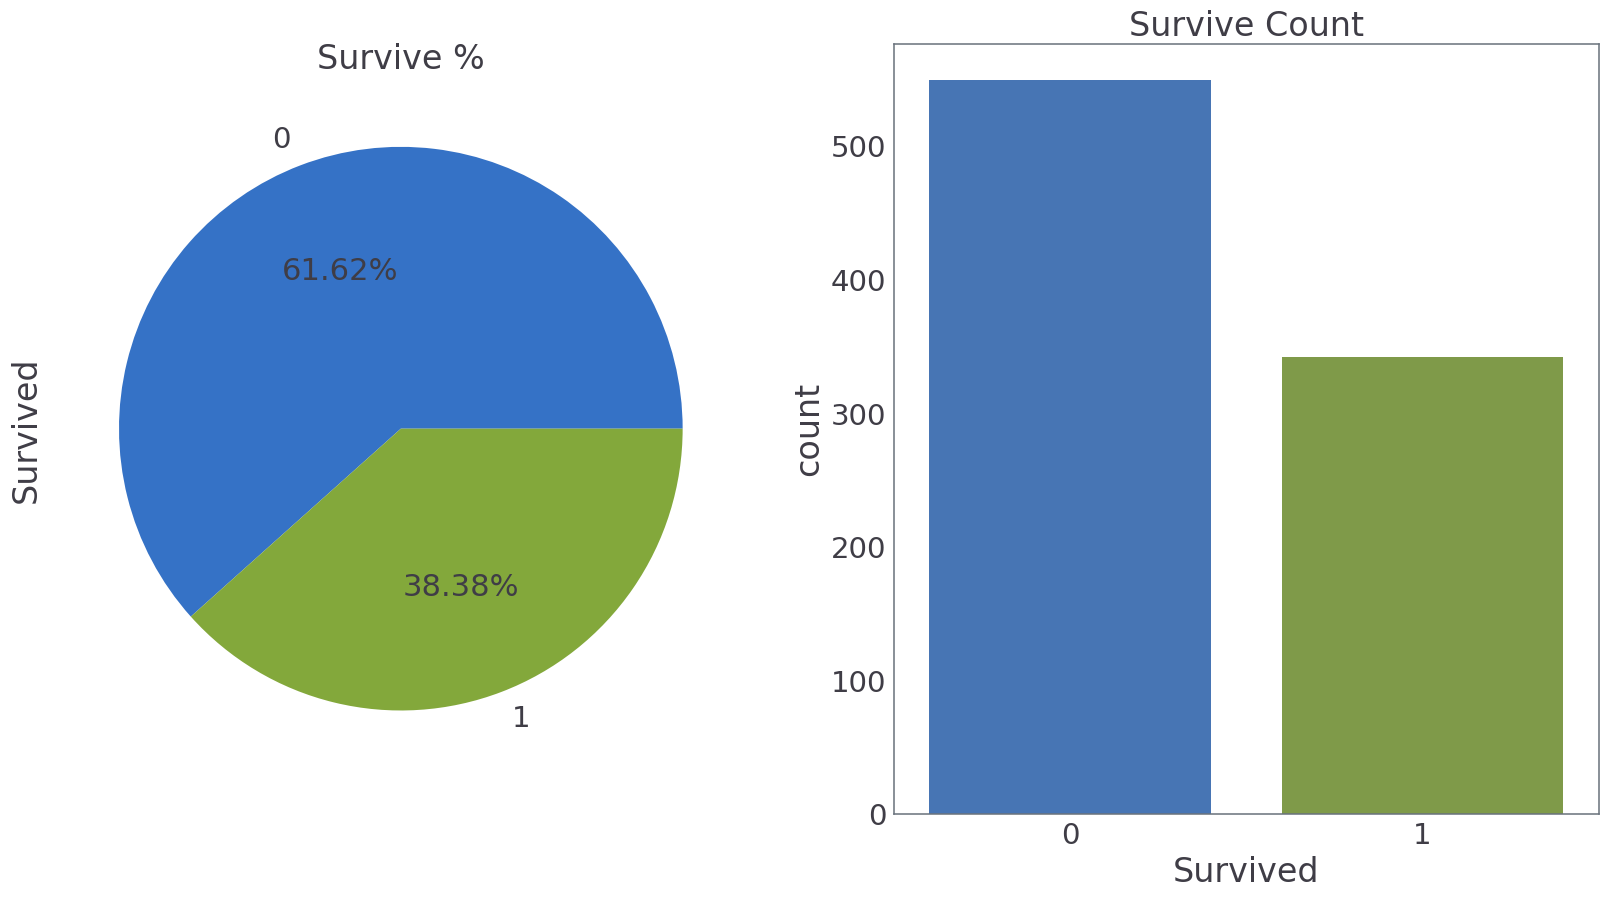

In [11]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

vc_df = df_train['Survived'].value_counts()
vc_df.plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survive %')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Survive Count')

plt.show()

# 데이터 분석

## Pclass
- 클래스가 높을수록 생존률이 높음
    - 1st : 63%
    - 2st : 47%
    - 3st : 24%

In [12]:
# Pclass별 승객
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
# Pclass별 생존
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
pd.pivot_table(df_train[['Pclass', 'Survived']], index = ['Pclass'], aggfunc = ['count','sum'])

,count,sum
,Survived,Survived
Pclass,,
1,216,136
2,184,87
3,491,119


In [15]:
# index, columns
# margins = 합계 추가 여부(boolen)
df = pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)
df

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [16]:
df['survived%'] = df.apply(lambda x : x[1] / x['All'], axis = 1)
df

Survived,0,1,All,survived%
Pclass,,,,
1,80,136,216,0.629630
2,97,87,184,0.472826
3,372,119,491,0.242363
All,549,342,891,0.383838


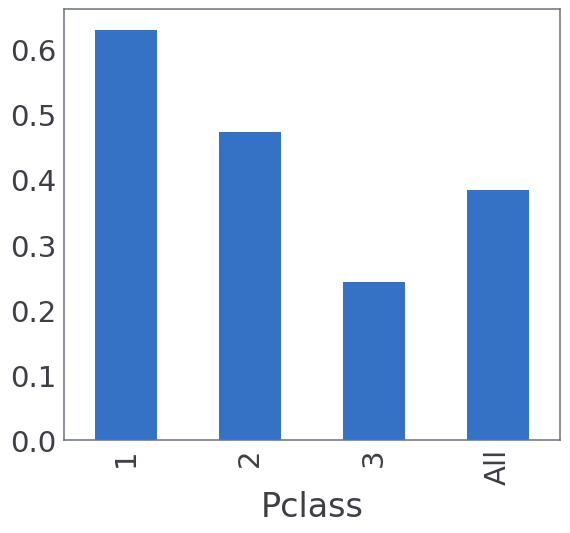

In [17]:
df['survived%'].plot.bar()
plt.show()

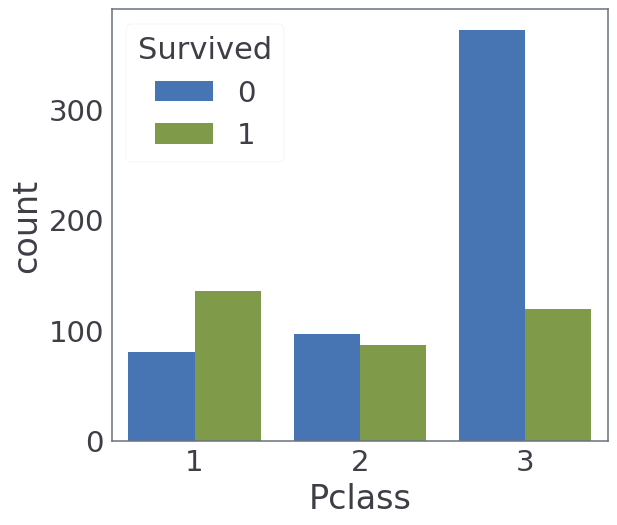

In [18]:
sns.countplot('Pclass', hue='Survived', data=df_train)
plt.show()

## Sex
- 여성의 생존률이 높음
    - male : 19%
    - female : 74%

In [19]:
df = pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)
df['survived%'] = df.apply(lambda x : x[1] / x['All'], axis = 1)
df

Survived,0,1,All,survived%
Sex,,,,
female,81,233,314,0.742038
male,468,109,577,0.188908
All,549,342,891,0.383838


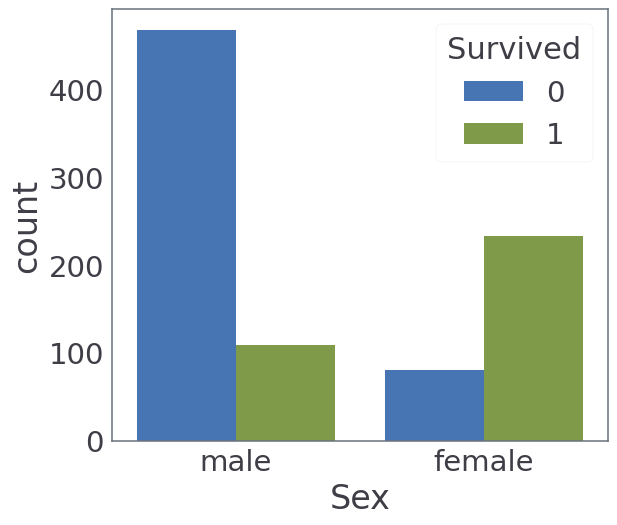

In [20]:
sns.countplot('Sex', hue='Survived', data=df_train)
plt.show()

## Age

In [21]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


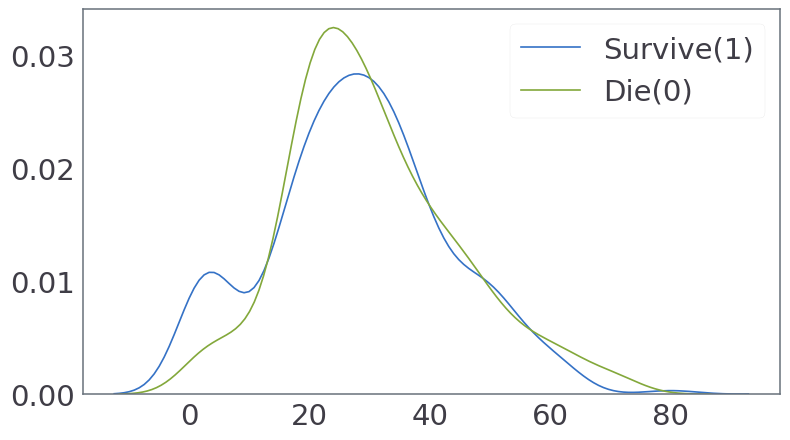

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survive(1)', 'Die(0)'])
plt.show()

- 나이가 어릴수록 생존률이 높음

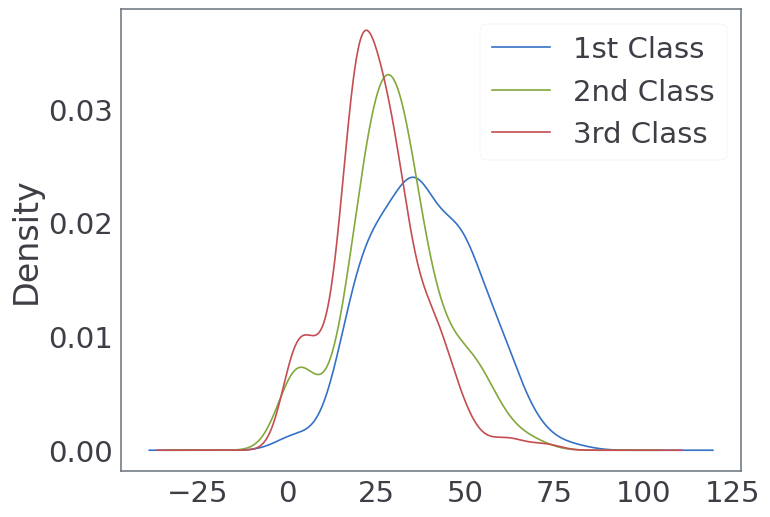

In [23]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

- Class가 높을수록 나이 많은 사람의 비중이 커짐

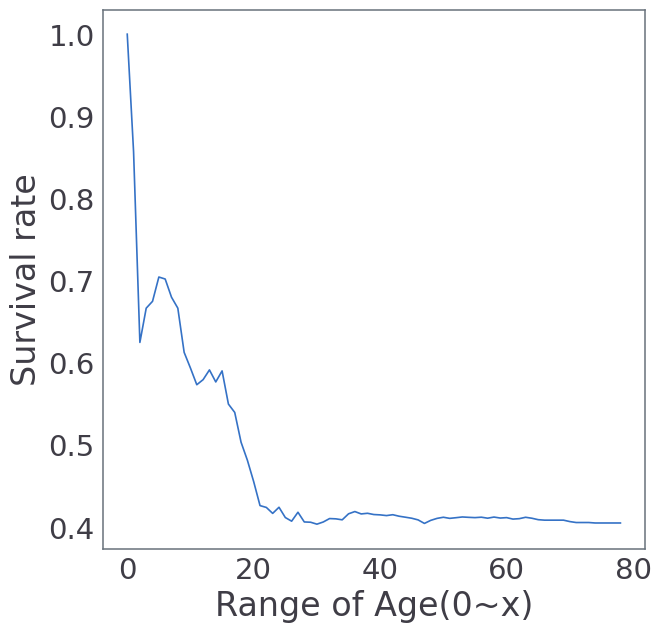

In [24]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

## Pclass, Sex

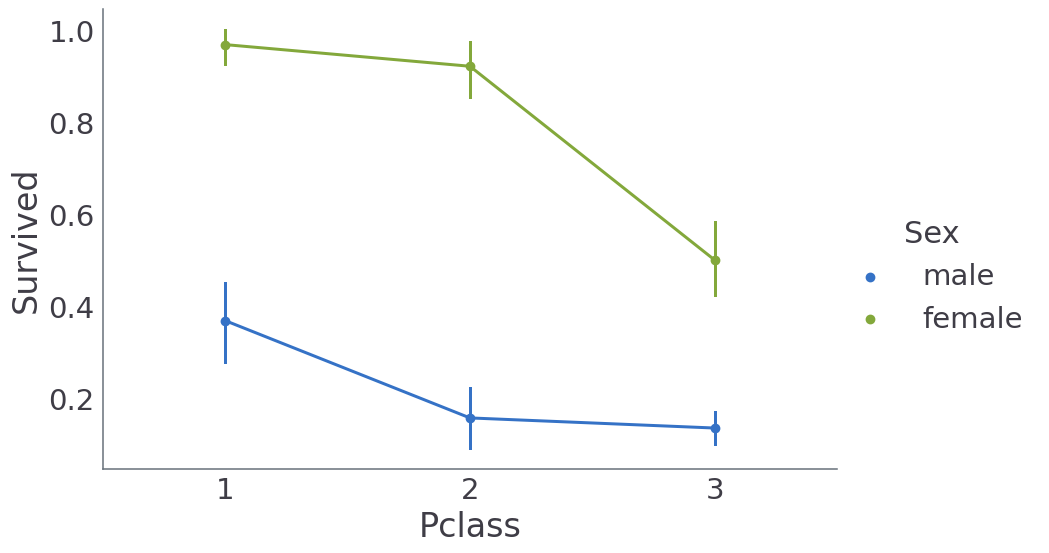

In [25]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)
plt.show()

- 모든 클래스에서 여성의 생존률이 높음

## Pclass, Sex, Age

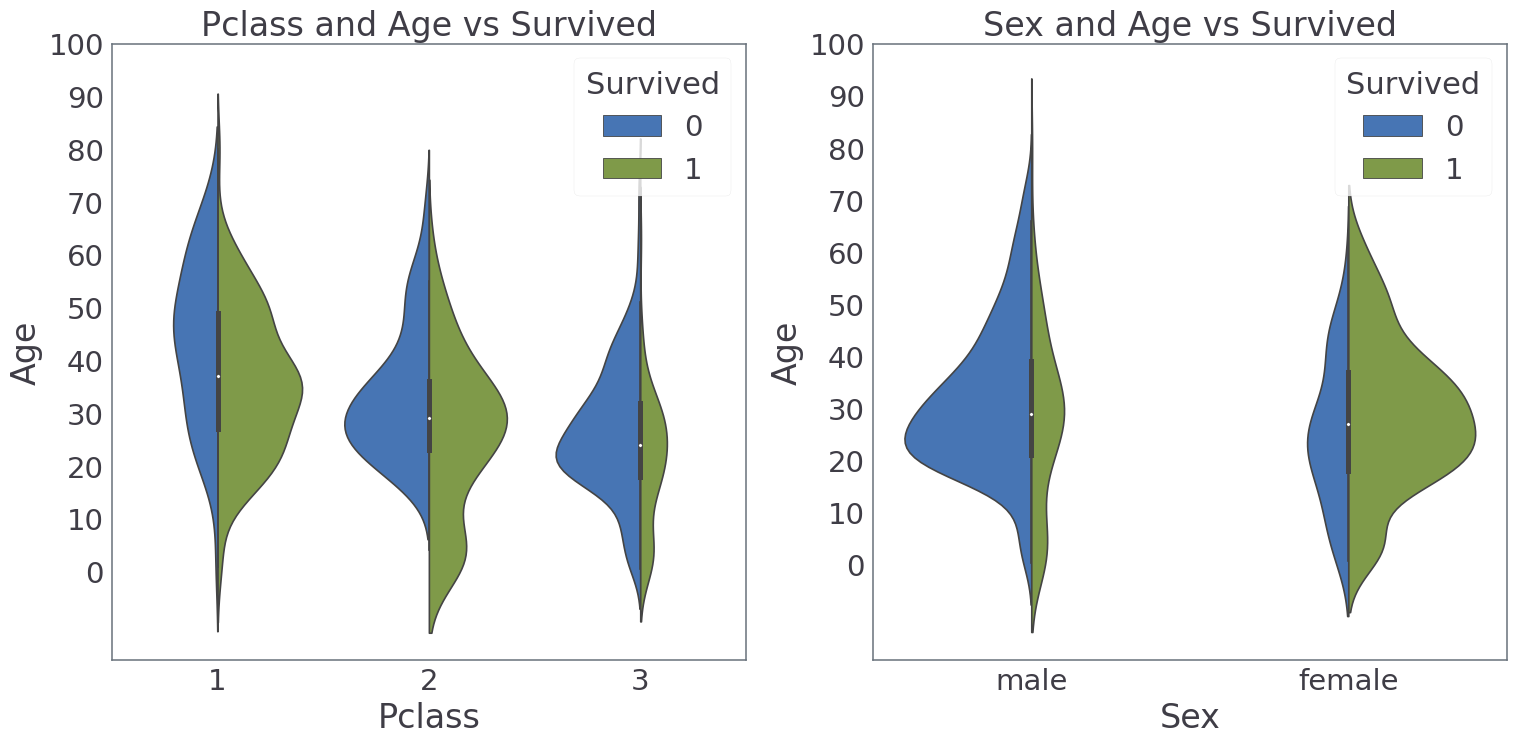

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## Embarked

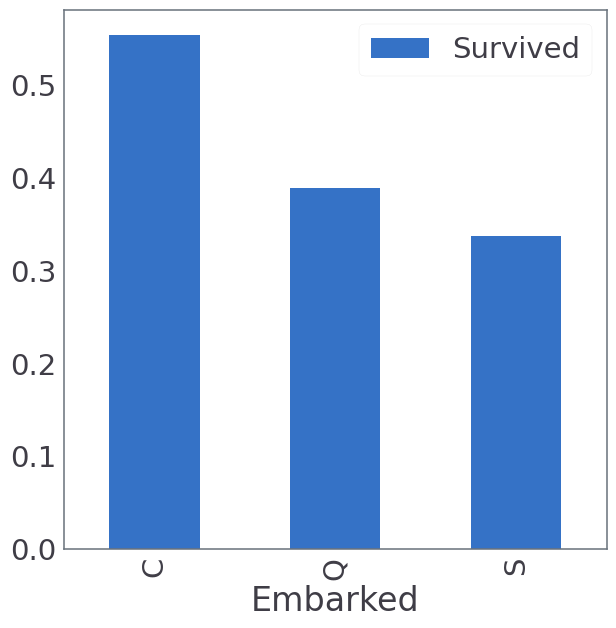

In [27]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)
plt.show()

- C의 생존률이 가장 높고, S의 생존률이 가장 낮음

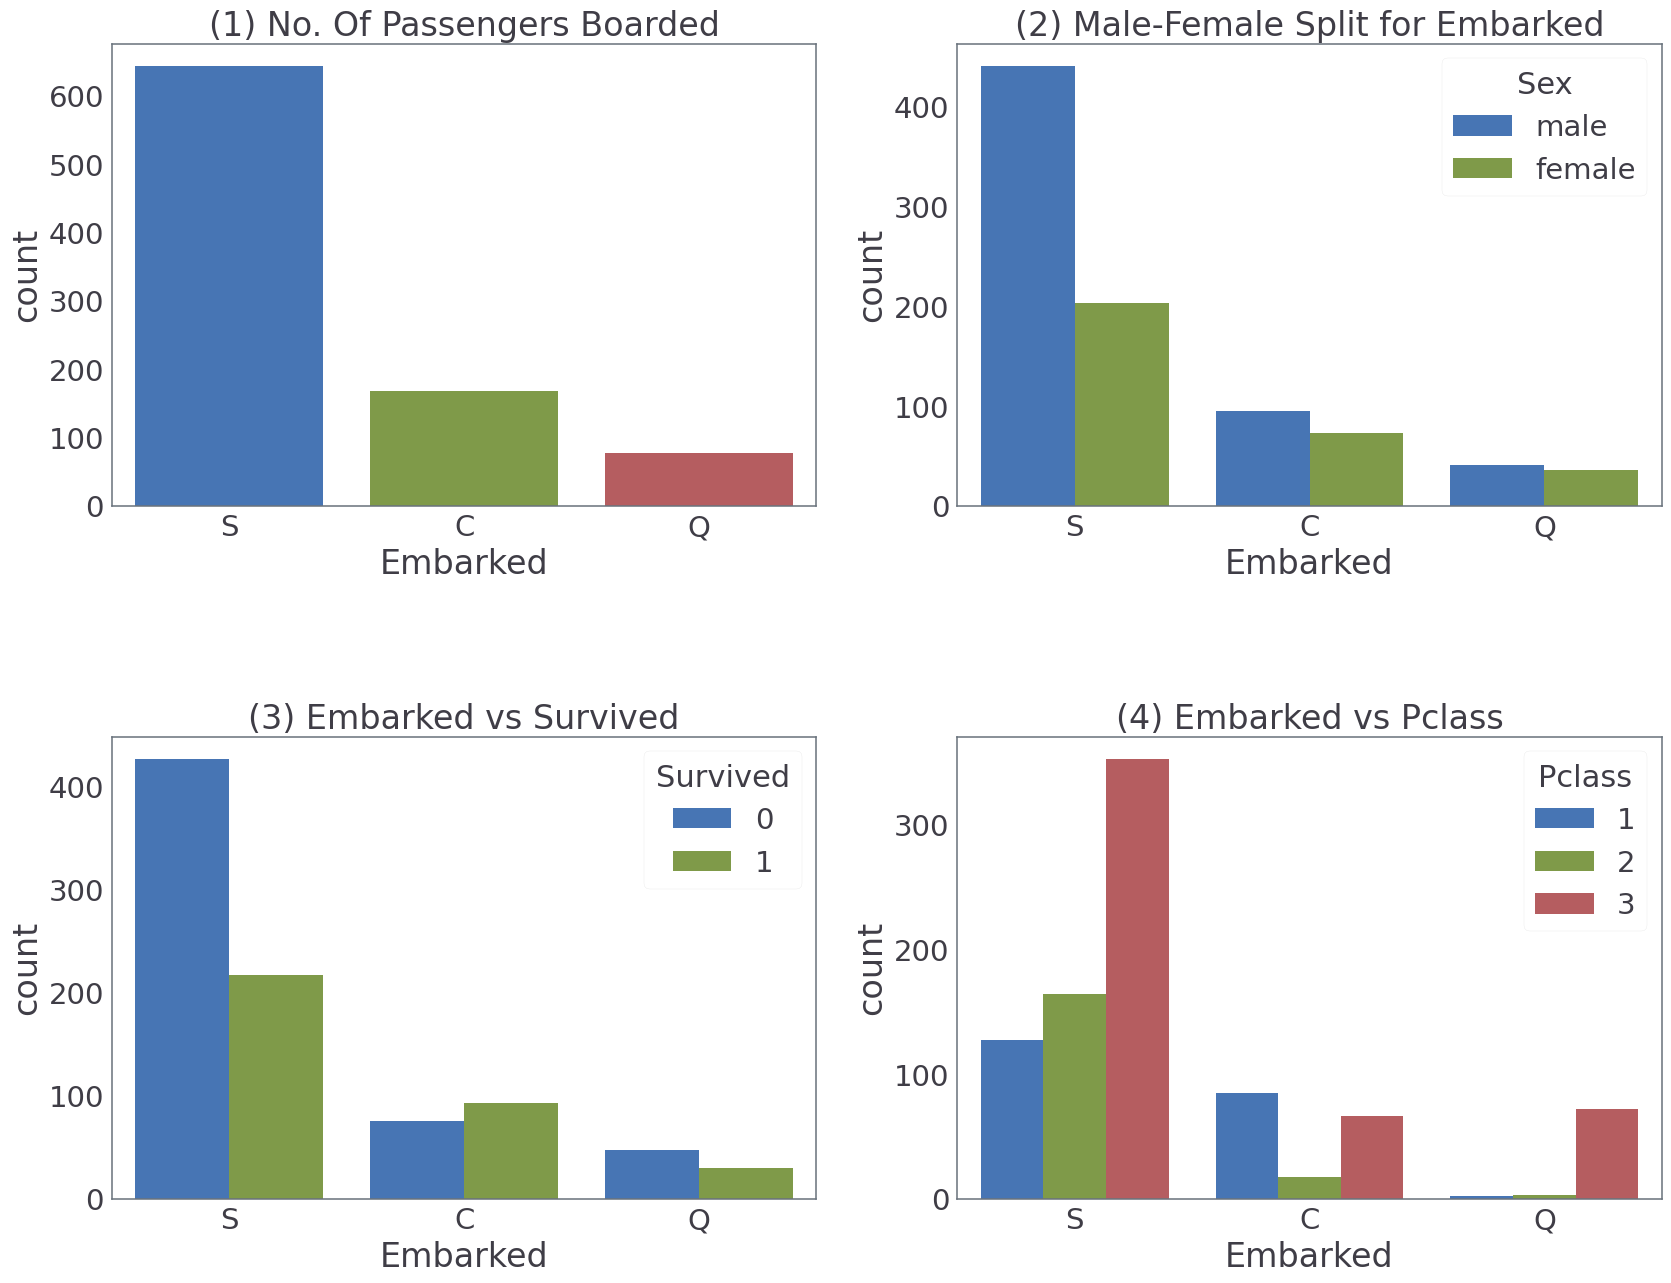

In [28]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 탑승객의 수 : S > C > Q
- S는 남녀 비율이 불균형
    - 생존률이 낮은 이유일 수 있음
- C의 1클래스 탑승객 비율이 높음 
    - 생존률이 높은 이유일 수 있음

## FamilySize

In [29]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [30]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


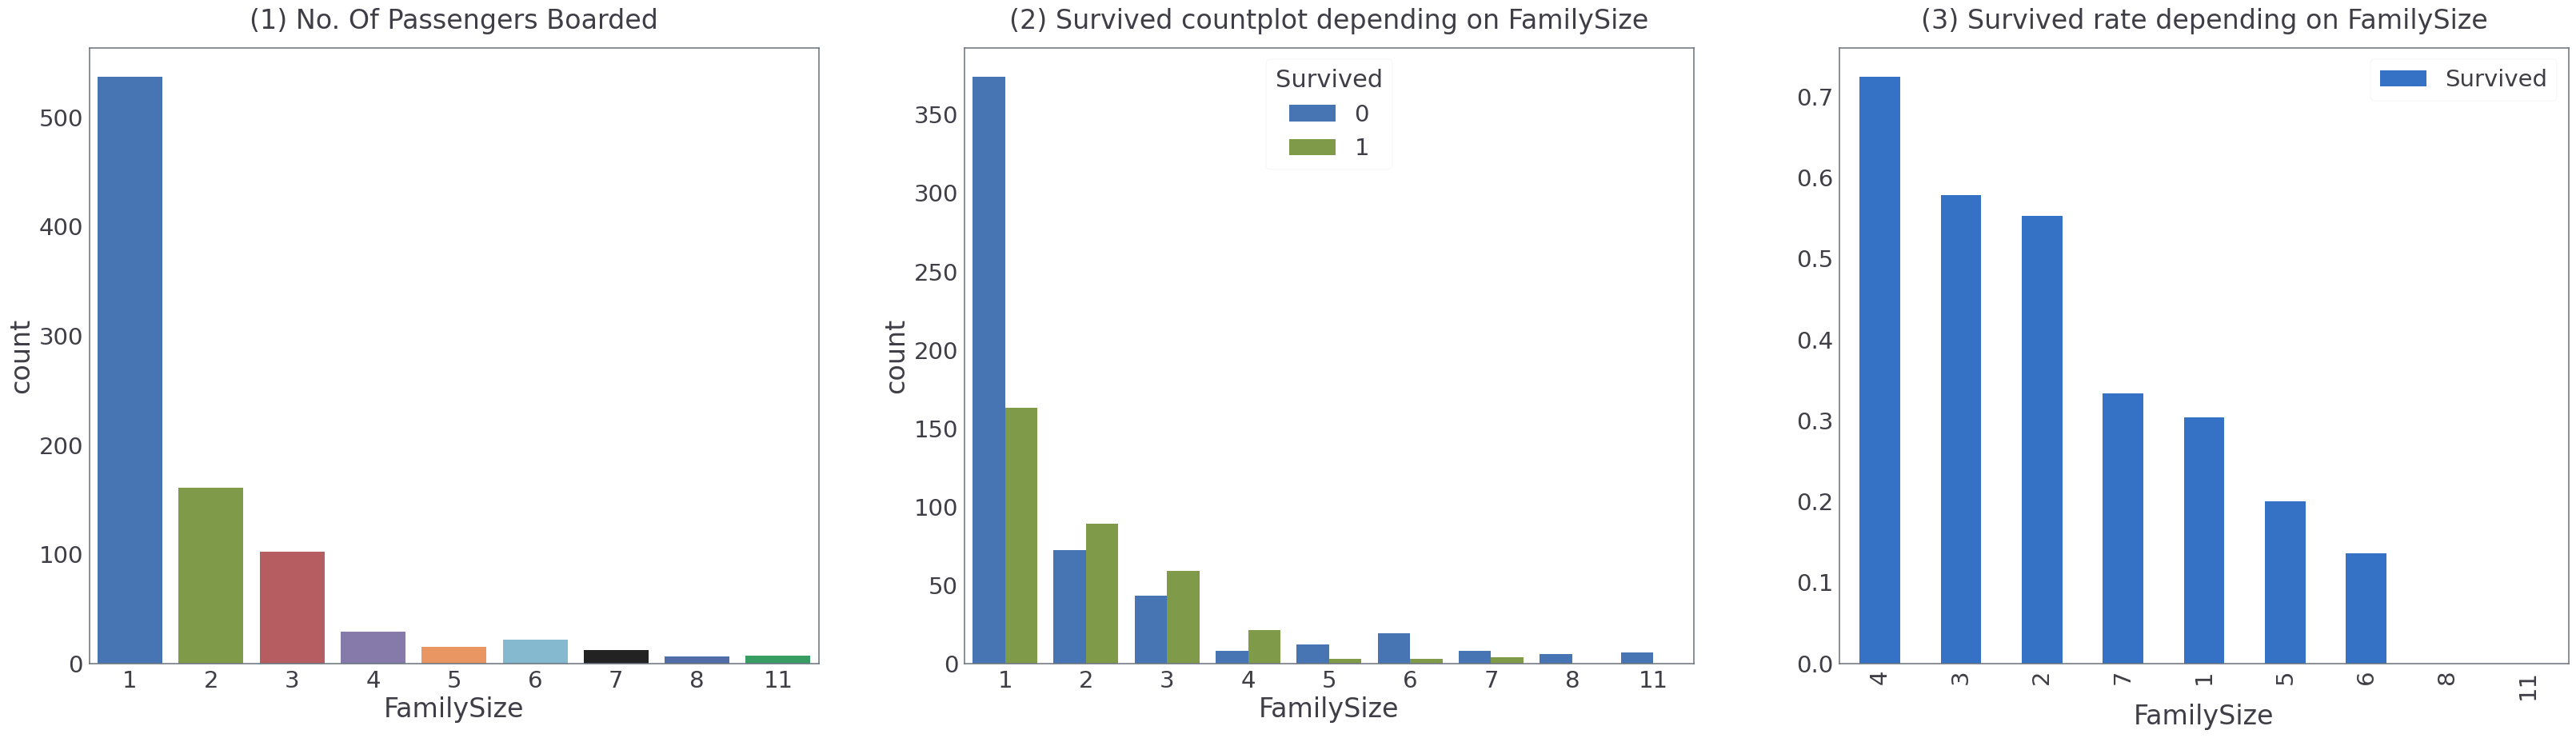

In [31]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 4인 가족의 생존률이 가장 높음
- 4,3,2의 생존률이 높으며, 너무 많거나 적으면 생존률 떨어짐

## Fare

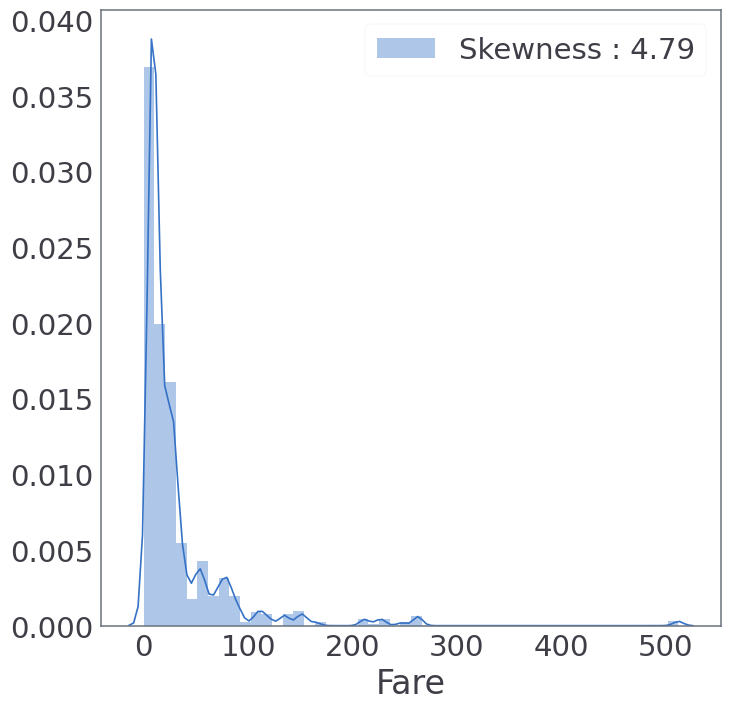

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')
plt.show()

- 비용에 대한 그래프가 비대칭
    - 아웃라이너에 대해 잘못 학습할 확률이 높음
- log를 사용하여 비대칭성을 감소시킴

## Ticket

In [33]:
df_train['Ticket'].value_counts()

347082      7
1601        7
CA. 2343    7
3101295     6
CA 2144     6
           ..
2647        1
370373      1
240929      1
349246      1
PC 17590    1
Name: Ticket, Length: 681, dtype: int64

- 피쳐가 다양하므로, 제외

## Cabin
- Null데이터가 너무 많으므로 제외

# Fill mising Data

## Age
- 탑승객 이름에 Mrr, Miss, Mrs 와 같은 명칭이 존재
- 이를 사용하여 age 범위 설정

In [34]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') 
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')

In [35]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 특정 명칭이 성별에 따라 달라짐을 확인

In [36]:
before_str = ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona']
after_str = ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr']

df_train['Initial'].replace(before_str, after_str, inplace=True)
df_test['Initial'].replace(before_str, after_str, inplace=True)

In [37]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778,1.222222


In [38]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

## Embarked
- null data == 2
- S의 탑승객이 가장 많으므로 S로 채움

In [39]:
df_train['Embarked'].fillna('S', inplace=True)

# Feature Engineering

## Age 그루핑

In [40]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else : return 7    

In [41]:
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

## Embarked 그루핑

In [42]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

## Sex 그루핑

In [43]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

## Initial 그루핑

In [44]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

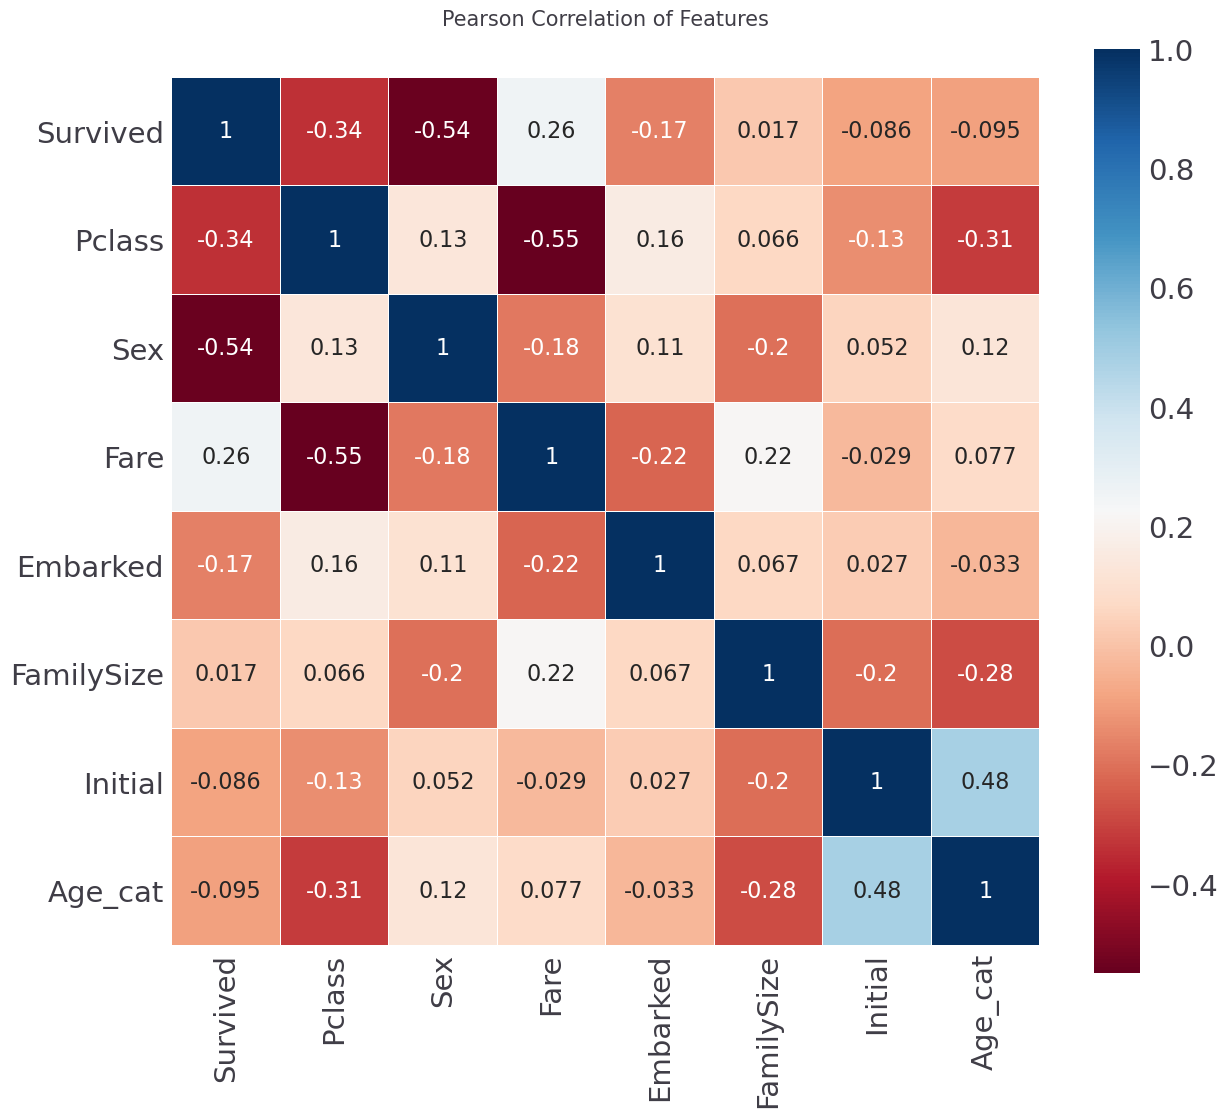

In [45]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
plt.show()
del heatmap_data

## One-hot encoding

### Initial

In [46]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

### Embarked

In [47]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [48]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,1,3,0,0,1,0,0,0,0,1


## Drop columns

In [49]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Machine Learning

In [50]:
from sklearn.ensemble import RandomForestClassifier # 유명한 randomforestclassfier 입니다. 
from sklearn import metrics # 모델의 평가를 위해서 씁니다
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수입니다.

## train-valid split

In [51]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [52]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, 
                                            target_label, 
                                            test_size=0.3, 
                                            random_state=2018)

## Modeling

In [53]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [54]:
metrics.accuracy_score(prediction, y_vld)

0.8432835820895522

## Feature Importance

In [55]:
from pandas import Series

importance = model.feature_importances_
Series_feat_imp = Series(importance, index=df_test.columns)

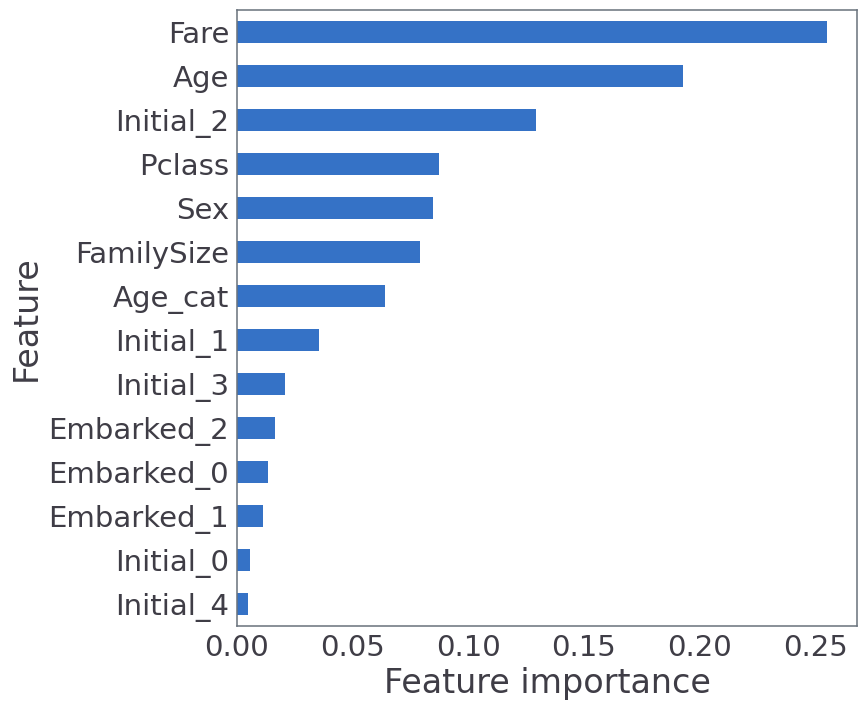

In [56]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()